In [17]:
import sys

sys.path.append('/Users/antonbaleatolizancos/Projects/direct_SHT/direct_sht/sht')
from sht import DirectSHT

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# We can very quickly calculate Ylm values. As an example, compute them up to lmax=Nl
Nl  = 500
Nx  = 1024

sht = DirectSHT(Nl,Nx)

In [73]:
# Put a band on point on the equator
phis = np.linspace(0, 2*np.pi, 10)
thetas = np.ones_like(phis)*np.pi/2
wts = 1e5*np.ones_like(thetas)

# And some along the meridian
new_thetas = np.linspace(0, np.pi, 10)
thetas = np.append(thetas, new_thetas)
phis = np.append(phis, np.zeros_like(new_thetas))

wts = np.append(wts, 1e5*np.ones_like(new_thetas))

In [74]:
alms = sht(thetas, phis, wts)

Sorting took  1.1920928955078125e-05  seconds.
Digitizing took  0.00036025047302246094  seconds.
Precomputing vs took  0.744009256362915  seconds.
Computing alm's took  0.6587238311767578  seconds.
Sorting took  2.7894973754882812e-05  seconds.
Digitizing took  0.0002181529998779297  seconds.
Precomputing vs took  0.822829008102417  seconds.
Computing alm's took  0.6763560771942139  seconds.


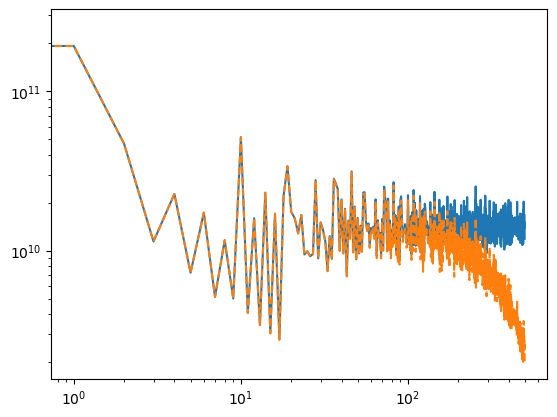

In [78]:
# Let's convolve the alms with a beam 
alms_smooth = hp.sphtfunc.smoothalm(alms, fwhm=np.pi/500, pol=False, inplace=False)
plt.loglog(hp.alm2cl(alms))
plt.loglog(hp.alm2cl(alms_smooth), ls='--')

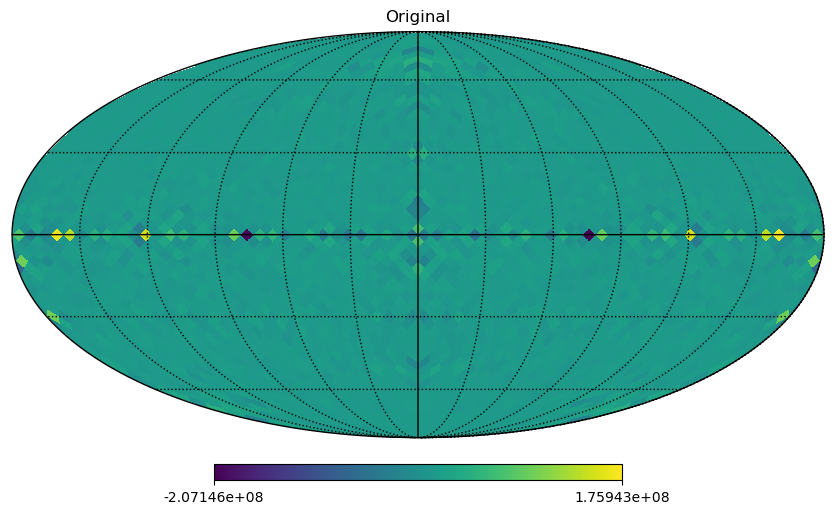

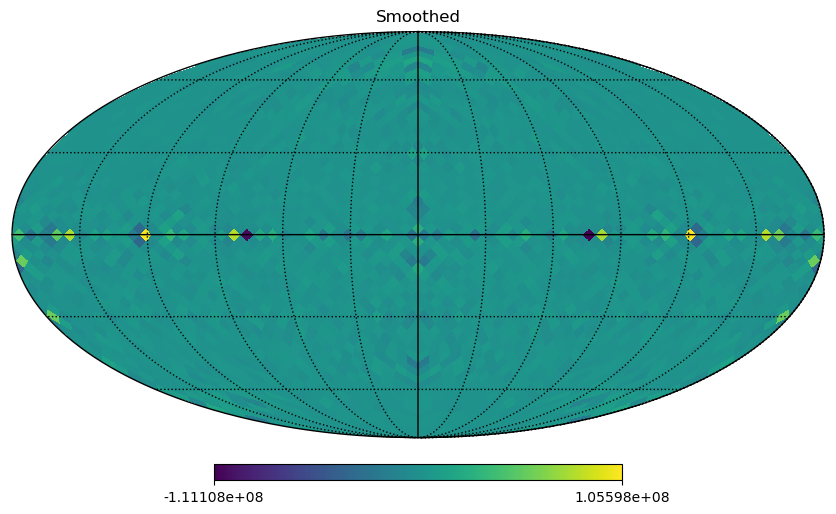

In [79]:
nside = 16

hp.mollview(hp.alm2map(alms, nside), title='Original')
hp.graticule()
plt.show()
hp.mollview(hp.alm2map(alms_smooth, nside), title='Smoothed')
hp.graticule()
plt.show()